In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import json
from pandas.io.json import json_normalize
%matplotlib inline

ModuleNotFoundError: No module named 'geoplot'

First we want to get some data from google takeout (https://takeout.google.com/settings/takeout).

Want to deselect all apart from the google location data and click through to get the zip file.
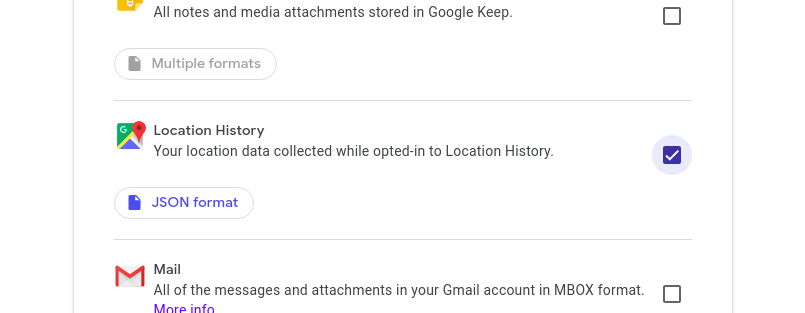

Google will take a minute to get the download ready... when downloaded extract into the Data directory

Use the json library to load the data into a dict and then convert to a pandas dataframe

In [9]:
with open("Data/Location History.json") as f:
    location_data = json.load(f)
df = pd.DataFrame(location_data['locations'])
df.head()

,timestampMs,latitudeE7,longitudeE7,accuracy,activity,velocity,altitude,heading,verticalAccuracy
0,1391180865996,507224961,-35365829,2139,NaN,NaN,NaN,NaN,NaN
1,1391182697066,507372438,-35356969,26,"[{'timestampMs': '1391182714919', 'activity': ...",NaN,NaN,NaN,NaN
2,1391182756676,507372972,-35355833,33,NaN,NaN,NaN,NaN,NaN
3,1391182842832,507373535,-35356288,20,"[{'timestampMs': '1391182788217', 'activity': ...",NaN,NaN,NaN,NaN
4,1391182903118,507373168,-35356262,24,NaN,NaN,NaN,NaN,NaN


Now need to make points opjects to store the data in. Google delivers the 
data in lat/long but multiplied by 1e7. 

In [10]:
 df['points'] = df.apply(lambda x: Point(x.longitudeE7/1e7,x.latitudeE7/1e7), axis=1)

Now we make a GeoDataFrame we need to specify the geometry and the coordinate system. ESPG are a series of codes which specify the coordinate system EPSG:4326 is lat/long. 

In [66]:
google_crs = {'init': 'epsg:4326'}
crs = {'init': 'epsg:27700'}
geo_df =gpd.GeoDataFrame(df,crs=google_crs,geometry=df['points'])
geo_df = geo_df[::].to_crs(crs)

Now to load an outline map for the background these can come from geopandas itself or I also downloaded high res open source files from the Ordinance Survey:

http://parlvid.mysociety.org/os/
https://webarchive.nationalarchives.gov.uk/20160105132713/https://www.ordnancesurvey.co.uk/opendatadownload/products.html

In [46]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.to_crs(crs)
map_outline = world

map_outline = gpd.read_file("Data/high_water_polyline.shp")
map_outline_correct_coords = map_outline.to_crs({'init': 'epsg:4326'})

(-600000.0, 10000000.0)

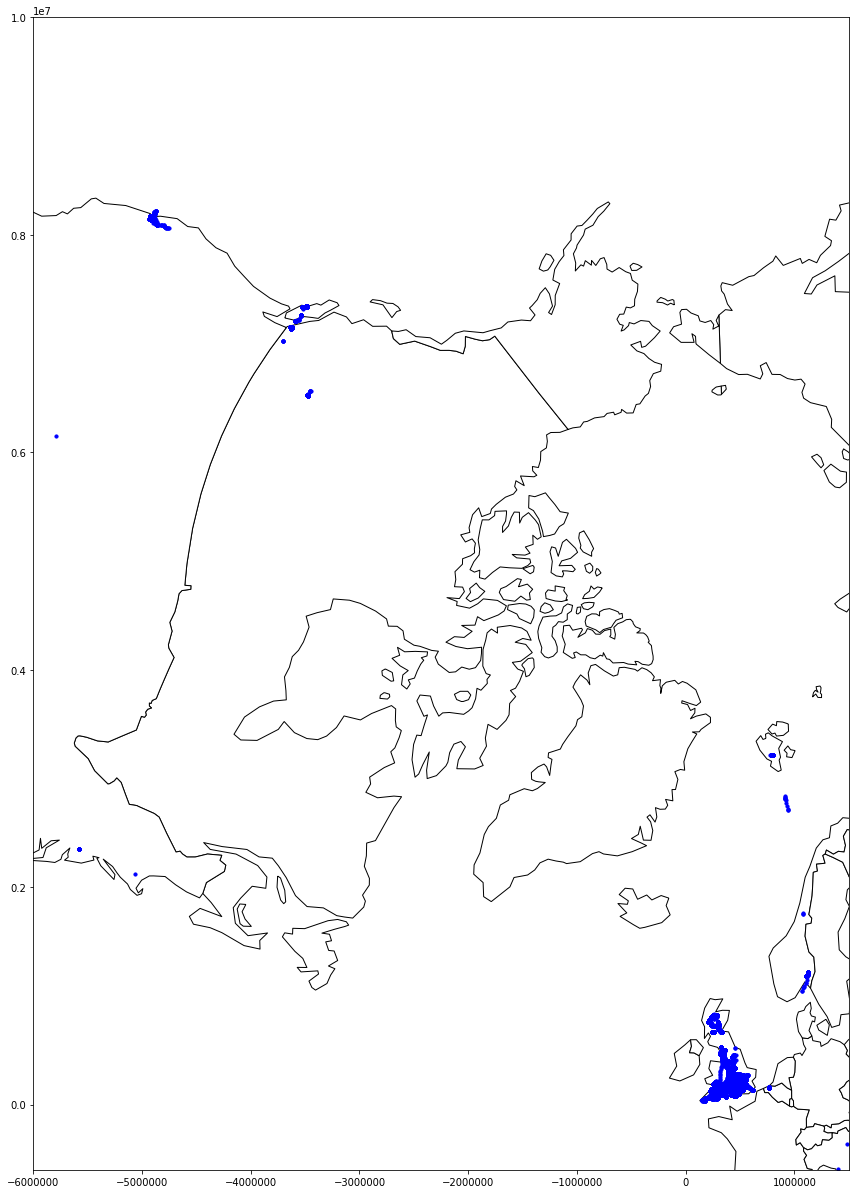

In [68]:
xcoords = (-0.6e7,1.5e6)
ycoords = (-6e5,10e6)
plot_width = 15
scale = (xcoords[1]-xcoords[0])/plot_width
plot_height = (ycoords[1]-ycoords[0])/scale

fig,ax = plt.subplots(figsize = (plot_width,plot_height))
map_outline.plot(ax=ax, color = 'w', edgecolor = 'black')
#world.plot(ax=ax) # Uncomment to plot against a world map
geo_df.plot(ax=ax, markersize=10,color='b')
plt.xlim(*xcoords) # England
plt.ylim(*ycoords) # England
